# INSTABOT 2

### The aim is to extract more profound information to analyze the activites performed by the food bloggers.

Required Libraries:-

In [1]:
## To Perform Automation
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# For Data Manipulation
import pandas as pd
import numpy as np

## To Analyze and Visualize the Data
import matplotlib.pyplot as plt

In [11]:
## Login to your Instagram Handle

driver = webdriver.Chrome(executable_path = 'C:/Users/Sukriti Macker/chromedriver_win32/chromedriver')
driver.get('https://www.instagram.com')

time.sleep(7)


'''
ANOTHER WAY
# try:
#     wait=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.LINK_TEXT,'Log in')))
# finally:
#     driver.quit()
# wait_to_login.click()
'''

##Submit with sample username and password

username=driver.find_element_by_name('username')
username.click()
username.send_keys('SAMPLE USERNAME')

password=driver.find_element_by_name('password')
password.click()
password.send_keys('SAMPLE PASSWORD')

time.sleep(2)

password.submit()

In [13]:
# To decline to receive notification on your Desktop

driver.find_element_by_class_name('HoLwm ').click()

In [14]:
## Type for “food” in search bar and print all the names of the Instagram Handles that are displayed in list after typing “food”
## (Make sure to avoid printing hashtags)

search_box=driver.find_element_by_class_name('x3qfX')
search_box.clear()
search_box.send_keys('food')

In [15]:
## Extracting the URLs of the handles that appeared after searching for "food"

urls_insta_handles_food=[]

drop_down=driver.find_elements_by_xpath('//div[@class="fuqBx"]/a')
for i in drop_down:
    if 'tags' in i.get_attribute('href') or 'location' in i.get_attribute('href'):
        continue
    else:
        urls_insta_handles_food.append(i.get_attribute('href'))
        
print(urls_insta_handles_food)

['https://www.instagram.com/thefoodblogger02/', 'https://www.instagram.com/delhifoodwalks/', 'https://www.instagram.com/yourfoodlab/', 'https://www.instagram.com/foodloviee/', 'https://www.instagram.com/foodiewe/', 'https://www.instagram.com/foodienator81/', 'https://www.instagram.com/food/', 'https://www.instagram.com/foodys/', 'https://www.instagram.com/foodiepandas_/', 'https://www.instagram.com/street_food_chandigarh/', 'https://www.instagram.com/foodvideo/', 'https://www.instagram.com/foodie_incarnate/', 'https://www.instagram.com/foodnetwork/', 'https://www.instagram.com/delhifoodguide/', 'https://www.instagram.com/foodinsider/', 'https://www.instagram.com/foodtalkindia/', 'https://www.instagram.com/food.gazers/', 'https://www.instagram.com/agrimavermaaa/', 'https://www.instagram.com/dilsefoodie/', 'https://www.instagram.com/fun.foodie.tastic/', 'https://www.instagram.com/foodrush.recipe/', 'https://www.instagram.com/food_food_242002/', 'https://www.instagram.com/tasteofgirl/', '

In [16]:
##From the list of instagram handles obtained; Open the first 10 handles

handle_numFollowers={}
for i in urls_insta_handles_food[:10]:
    driver.get(i)

    time.sleep(5)
    followers_count = driver.find_elements_by_xpath('//span[contains(@class,"g47SY")]')

    follow_c = (followers_count[1].get_attribute('title')) ##important line
    follow_co=follow_c.replace(',','')
    follow_count=int(follow_co)
    name=driver.find_element_by_class_name('fDxYl     ')
    data=name.text
    if follow_count in handle_numFollowers:
        continue
    else:
        handle_numFollowers[follow_count]=data

print(handle_numFollowers)

{8458: 'thefoodblogger02', 131806: 'delhifoodwalks', 1517506: 'yourfoodlab', 683: 'foodloviee', 34219: 'foodiewe', 145: 'foodienator81', 102239: 'food', 8881970: 'foodys', 57: 'foodiepandas_', 83980: 'street_food_chandigarh'}


In [17]:
## Arranging the Instagram Handles in descending order with respect to the maximum number of followers

ans=sorted(handle_numFollowers.keys())
handle_name=[]
for i in ans[:4:-1]:
    handle_name.append(handle_numFollowers.get(i))
    print(i,handle_numFollowers.get(i))
    
    
handle_name

8881970 foodys
1517506 yourfoodlab
131806 delhifoodwalks
102239 food
83980 street_food_chandigarh


['foodys', 'yourfoodlab', 'delhifoodwalks', 'food', 'street_food_chandigarh']

In [18]:
## Find the number of posts these handles have done in the previous 3 days.
## (Extremely imp piece of code)

d={}
for f in handle_name:
    ##search_box=driver.find_element_by_class_name('x3qfX')
    wait=WebDriverWait(driver,10)

    wait_to=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'x3qfX')))
    
    wait_to.clear()
    wait_to.send_keys(f)
    
    time.sleep(10)
    
    for i in range(2):
        
        wait_to.send_keys(Keys.ENTER)
    
    time.sleep(4)
    
    driver.execute_script('window.scrollBy(0,3000);')
    
    time.sleep(4)

    
    button=driver.find_elements_by_xpath('//div[contains(@class,"weEfm")]/div/a')
    urls=[]
    
    for i in button[:50]:
        urls.append(i.get_attribute('href'))
    count=0   
    for i in urls:
        
        driver.get(i)
        day=driver.find_element_by_class_name('Nzb55')
        
        if 'h' in day.text or 'm' in day.text:
            count+=1
            
        elif '1d' in day.text or '2d' in day.text or '3d' in day.text:
            count+=1
            
        else:
            key=count
            d[key]=f
            break
            
    print(count,f)  

12 foodys
7 yourfoodlab
5 delhifoodwalks
4 food
6 street_food_chandigarh


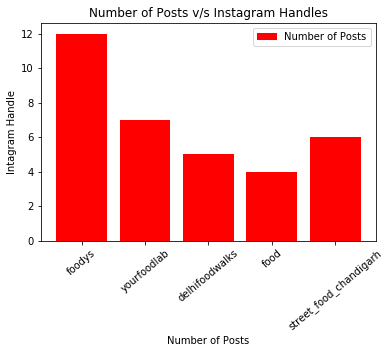

In [23]:
## Visualizing the number of posts done by each blogger

x=d.values()
y=d.keys()
plt.xlabel("Number of Posts")
plt.ylabel("Intagram Handle")
plt.title("Number of Posts v/s Instagram Handles")
plt.bar(x,y,label="Number of Posts", color="red")
plt.xticks(rotation=40)
plt.legend()
plt.show()

In [32]:
## Open the 5 handles you obtained in the previous code, and scrape the content of the first 10 posts of each handle.


newlist=[]
for f in handle_name:
    ##search_box=driver.find_element_by_class_name('x3qfX')
    wait=WebDriverWait(driver,10)

    wait_to=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'x3qfX')))
    
    wait_to.clear()
    
    wait_to.send_keys(f)
    
    time.sleep(10)
    
    for i in range(2):
        
        wait_to.send_keys(Keys.ENTER)
    
    time.sleep(4)
    
    driver.execute_script('window.scrollBy(0,10000);')
    
    time.sleep(4)

    
    button=driver.find_elements_by_xpath('//div[contains(@class,"weEfm")]/div/a')
    urls=[]
    
    for i in button[:50]:
        urls.append(i.get_attribute('href'))
    contents=[]
    
    for i in urls[:10]:
        driver.get(i)
        content=driver.find_element_by_xpath('//div[@class="C4VMK"]/span')
        contents.append(content.text)
    newlist.extend(contents)
    


In [33]:
## Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

ans=[]
for i in newlist:
    ans.append(i.split())


new_dict={}
count=0
for i in ans:
    for j in i:
        key=j
        if key in new_dict:
            count=count+1
            new_dict[key]=count  

        else:
            new_dict[key]=1
            
print(new_dict)

{'Saturday': 28, 'Eve!': 1, 'Mocktail': 1, 'Party!': 1, '@@': 1, 'Dr.Sheesha,': 1, 'JP': 1, 'Nagar': 166, '(From': 1, 'the': 1211, 'top': 1, 'left': 238, 'to': 1216, 'right': 886, 'bottom)': 1, '•Sea': 1, 'Blue': 1, '•Green': 1, 'Apple': 509, 'Martini': 1, '•Passion': 1, 'Fruit': 194, 'Malt': 1, 'Beer': 1, '•Peach': 1, 'Cooler': 1, 'Ratings': 35, '-': 1158, '3.5/5': 1, '#mocktailparty': 1, '#mocktail': 20, '#hookah': 1, '#hookahlounge': 1, '#hookahbar': 1, '#hookahplace': 1, '#party': 1, '#saturday': 1, '#saturdayevening': 1, '#foodporn': 1575, '#foodphotography': 1576, '#drinking': 1, '#drinkup': 1, '#bengaluru': 1, '#nammabengaluru': 1, '#summervibes': 1, '#summerdrink': 1, '#summerdrinks': 1, 'Fried': 1, 'rice': 2084, 'and': 2094, 'Gobi': 165, 'Manchurian': 161, 'combo': 745, 'Place': 753, '~': 164, 'Empire': 1, '4.5/5': 19, 'Price': 93, '99/-': 1, '#lunchbox': 1, '#lunch': 1245, '#friedrice': 1, '#gobimanchurian': 1, '#Manchurian': 169, '#empire': 1, '#foodcombo': 1, '#lunchdate': 

In [45]:
## Creating a CSV File for the obtained content

x_word={'words':list(new_dict.keys()),'frequency':list(new_dict.values())}

df=pd.DataFrame.from_dict(x_word)

df.to_csv('words_freq.csv')

In [73]:
wf_dict={}
for i in df['words']:
    if '#' in i:
        key=i
        wf_dict[key]=wf_dict.get(key,0)+1

In [75]:
print(wf_dict)

{'#mocktailparty': 1,
 '#mocktail': 1,
 '#hookah': 1,
 '#hookahlounge': 1,
 '#hookahbar': 1,
 '#hookahplace': 1,
 '#party': 1,
 '#saturday': 1,
 '#saturdayevening': 1,
 '#foodporn': 1,
 '#foodphotography': 1,
 '#drinking': 1,
 '#drinkup': 1,
 '#bengaluru': 1,
 '#nammabengaluru': 1,
 '#summervibes': 1,
 '#summerdrink': 1,
 '#summerdrinks': 1,
 '#lunchbox': 1,
 '#lunch': 1,
 '#friedrice': 1,
 '#gobimanchurian': 1,
 '#Manchurian': 1,
 '#empire': 1,
 '#foodcombo': 1,
 '#lunchdate': 1,
 '#fooddate': 1,
 '#chinesefood': 1,
 '#eats': 1,
 '#foods': 1,
 '#veganfoodie': 1,
 '#vegitarian': 1,
 '#govegan': 1,
 '#nkmpitstop': 1,
 '#bengalurufoodie': 1,
 '#loveforfood': 1,
 '#foodlover': 1,
 '#rice': 1,
 '#bangalore': 1,
 '#bangalorefoods': 1,
 '#eat': 1,
 '#eateries': 1,
 '#breakfast': 1,
 '#eater': 1,
 '#morningbreakfast': 1,
 '#idli': 1,
 '#idly': 1,
 '#vada': 1,
 '#foodoftheday': 1,
 '#foodstyling': 1,
 '#hereismyfood#beautifulcuisines': 1,
 '#bengalurucafe': 1,
 '#instafood': 1,
 '#foodgasm': 1